# Week 7 Exercises


## Exercise 1: Convolution and Pooling: close
In this exercise we will see if we can get a better grasp of convolution and pooling.
Your job is to implement basic convolution and pooling.

For this we need the python package pillow  which you need to install

- The Convolution operator that takes a $d \times d$ weight matrix and 1 channel image, and applies the convolution with the weight vector with the image.
- The max pooling operator takes an input image and a max pooling size and returns the pooled output.
    For simplicity we only consider 2 x 2 max pooling
- Test your convolution implementation with the $3 \times 3$ matrix with -1 everywhere exept the middle and 8 in the middle is a classic edge detector pattern.
- Test your pooling implementation by applying a $2 \times 2$ max pooling to the output of the convolution.

We assume that we pad the input to ensure the output of the convolution is the same width and height as the input image.

To compare your implementation we have supplied code that applies the convolution and the pooling operator from the neural net package in pytorch.





image shape (512, 512)


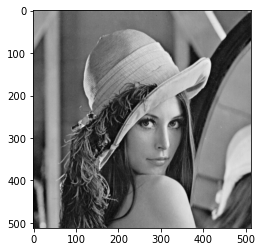

ValueError: operands could not be broadcast together with shapes (2,2) (3,3) 

In [1]:
# lena - fint better image
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image #(pacakge name is pillow - i.e. pip3 install pillow )
import os
filename = 'lena512_gray.bmp'

img = Image.open('lena512_gray.bmp')
lena = np.array(img)
print('image shape', lena.shape)
plt.imshow(lena, cmap='gray')
plt.show()

def conv2d(img, w):
    """ Return the result of applying the convolution defined by w to img - 
    for simplicity assume that w is square"""
    w_dim = w.shape[0]
    pad = w_dim - 2
    padded_img = np.pad(img, [pad, pad], 'constant', constant_values=0)    
    out = np.zeros(img.shape)
    ### YOUR CODE HERE
    for i in range(1,w_dim-1):
        for j in range(1,w_dim-1):
            out[i,j]= img[i-1:i+1,j-1:j+1]*w
            
    ### END CODE
    return out

def max_pool2d(img):
    """ Return the result of applying the 2 x 2 max pooling operator to mig (halve the width and height of image)"""
    out = np.zeros((int(img.shape[0]/2), int(img.shape[1]/2)))
    ### YOUR CODE HERE
    for i in range(1,out.shape[0]-1):
        for j in range(1,out.shape[1]-1):
            out[i,j]= max(img[i-1:i,j-1:j])
    ### END CODE
    return out

conv_filter = np.array([[-1., -1., -1.], [-1., 8, -1.], [-1., -1., -1.]])
convoluted_lena = conv2d(lena, conv_filter)
pooled_lena = max_pool2d(convoluted_lena)
fig, axes = plt.subplots(1, 2, figsize=(20, 16))
axes[0].imshow(convoluted_lena, cmap='gray', vmin=convoluted_lena.min(), vmax=convoluted_lena.max())
axes[1].imshow(pooled_lena, cmap='gray', vmin=convoluted_lena.min(), vmax=convoluted_lena.max())
plt.show()

In [4]:
x=range(0,20,2)
for n in x:
    print(n)

0
2
4
6
8
10
12
14
16
18


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch_lena = torch.from_numpy(lena).view(1, 1, lena.shape[0], lena.shape[1]).double()
print('image shape', torch_lena.shape)
tv = torch.tensor([[-1., -1., -1.], [-1., 8, -1.], [-1., -1., -1.]])
tv = tv.view(1, 1, 3, 3).double()
torch_convoluted_lena = F.conv2d(torch_lena, tv, torch.tensor([0.], dtype=torch.double), 1, 1, 1, 1)
print('convoluted_lena shape', torch_convoluted_lena.shape)
print('conv diff norm', np.linalg.norm(torch_convoluted_lena.numpy().squeeze() - convoluted_lena))
torch_pooled_lena = F.max_pool2d(torch_convoluted_lena, kernel_size=(2, 2))
print('pool diff norm', np.linalg.norm(torch_pooled_lena.numpy().squeeze() - pooled_lena))
fig, axes = plt.subplots(1, 2, figsize=(20, 16))
axes[0].imshow(torch_convoluted_lena.numpy().squeeze(), cmap='gray', vmin=torch_convoluted_lena.min(), vmax=torch_convoluted_lena.max())
axes[1].imshow(torch_pooled_lena.numpy().squeeze(), cmap='gray', vmin=torch_convoluted_lena.min(), vmax=torch_convoluted_lena.max())
plt.show()

## Exercise 2: How Many Parameters Does the VGG net use: complicated
The VGG net is a well known neural net architecture for image recognition. 

**How many parameters does it use? Write down a formula and compute the number!**

It has the following architecture [https://pytorch.org/docs/0.4.0/_modules/torchvision/models/vgg.html]

It takes as input an image of size 224 x 224 x 3.

222*222*3*64
154*222*3*64
vorige size/2 ^2

eerst omzetting: heel kader en dan 64 keer (2 keer doen)
helft *helft voor alle keren (64+64)
helft * helft voor alle keren (64*4)

First it computes 64, 3 x 3 x 3 convolutions i.e. makes 64 channels. Then it makes 64, 3 x 3 x 64 convolutions on the output of the previous convolution i.e. it makes 64 new channels. This is followd by  a $2 \times 2$ max pooling operation.

The pattern continues as described below: A number is the number of new convolutions made on previous input and 'M' means max pooling.

64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'

All convolutions are 3x3 using padding of 1 of zeros around the input so the convolution output size has height and width the same as the input.
All poolings are $2 \times 2$ non-overlapping (stride=2)

After the fully convolutional layers it used standard fully connected layers as
- 512 * 7 * 7, 4096 (why 512 * 7 * 7?)
- 4096, 4096,
- 4096, 1000
        



## Ex 3:  Bias Variance : achteraf cv-ish ma toch bekijken

-   Does Bias and Variance terms (two numbers) in the Bias Variance
    decomposition depend on the learning algorithm.
    yes
    

-   What is Variance (in Bias Variance tradoff) if we have a hypothesis
    set of size $1$ namely the constant model $h(x) = 2$. The learning
    algorithm always picks this hypothesis no matter the data.
    
    if it always outputs 2,what is the variance= 0 because variance is the squared difference between hypo van data en original


    ergens logisch: als je altijd dezelfde hypothese kiest is er geen variance tussen de aftand van de gemmidelde hypothese en deze daje op da moment kiest 
-   What is the Variance (in the Bias Variance tradeoff) if the simple
    hypothesis from the previous question is replaced by a very very
    sophisticated hypothesis.
    same answer, the expectation choses the hypo so always zero
    
    
    er is geen verschil
-   Assume the target function is a second degree polynomial, and the
    input to your algorithm is always eleven distinct (noiseless) points. Your
    hypothesis set is the set of all degreee 10 polynomial and the
    learning algorithm returns the hypothesis with the best fit
    (miniming least squared error) given the data. What is Bias and what
    is Variance?
    
    11 points altijd 1 solution, bias en variance zero
    
    altijd sero want alle punten kunnen gevit worden
    bias: 





## Ex 4: Bias Variance - Hard Exercise: check
Book Problem 2.24 part (a)

Short Version:
   
  - The target function is $f(x) = x^2$ and the cost is Least Squares.

  - Sample two points $x_1, x_2$ from $[-1, 1]$ uniformly at random to get the data set $D = \{(x_1, x_1^2), (x_2, x_2^2)\}$

  - Use hypothesis space $\{h(x) = ax +b\mid a,b\in\Bbb R\}$ i.e. lines. There are two parameters $a$ and $b$.

  - Given a data set $D = \{(x_1, x_1^2), (x_2, x_2^2)\}$ the algorithm returns the line that fits these points.

  - Your task is to write down an analytical expression for $\bar{g} = \mathbb{E}_D [h_D]$ where $h_D$ is the hypothesis learned on D.

**Step 1.** What is the in sample error of $h_D$ and why?
SUM(x^2-x^2)/n

zero something with line

**Step 2.** Given $D$ what are $a, b$ (defined by the line between $(x_1, x_1^2)$ and  $(x_2, x_2^2)$)? Hint: $x_2^2- x_1^2 = (x_2-x_1)(x_2 + x_1)$.
x2+x1 (rico is y2-y1/X2-X1)

-x2*x1 want ax+b=y dus b= y-ax=x1^2-ax1

**Step 3.** What is the expected value of the slope $a$ over $x_1$ and $x_2$?

of 0 want a is x1+x2 en zijn ze allebei verwach t0
**Step 4.** What is the expected value of the intercerpt $b$ over $x_1$ and $x_2$? 

-x1*x2 = - integraal 1/2)^2=0 


**More hints**
For the uniform distribution over $[-1,1]$ the mean is $0$ 





## Ex 5: Bias Variance Experiment 
In this exercise you must redo the experiment shown at the lectures.
This exercise takes up quite a lot of space so we have moved it to a separate notebook. Go to [BiasVariance Notebook](BiasVariance.ipynb)



